In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import torch

sys.path.append('/home/jdolli/chelsaCLIP/src/utils/positional_encoding')
from spheregrid import SphereGridSpatialRelationEncoder

In [2]:
def plot_array(arr, name, extent, aspect="auto", v=None):
    # bounds (min_lon, max_lon, min_lat, max_lat)
    print("Plotting:", name, arr.min(), arr.max(), arr.max()-arr.min())
    fig, ax = plt.subplots(figsize=(6,6))
    if v:
        ax.imshow(arr, extent=extent, aspect=aspect, vmin=v[0], vmax=v[1])
    else:
        ax.imshow(arr, extent=extent, aspect=aspect)
    plt.show()
    plt.clf()

In [3]:
#arr = np.random.rand(75, 75)
#plot_array(arr, "rand", (-4.807615, 8.238722, 42.325170, 51.235825))

In [4]:
# Map CHELSA
climatology_dir="/shares/wegner.ics.uzh/CHELSA/climatologies/1981-2010_numpy/"
raster = np.load(climatology_dir + "04_monthly_float16.npy")
raster.shape

(11, 20880, 43200)

In [5]:
mask = raster[0] > 30
for i in range(11):
    raster[i][mask] = 0

Plotting: Europe 0 -1.649 6.902 8.555


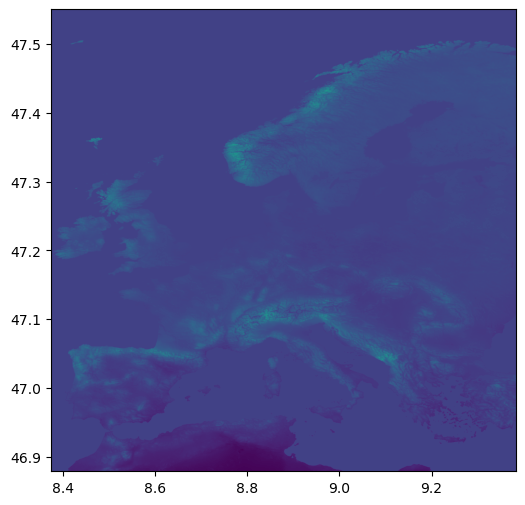

Plotting: Europe 1 -1.582 2.566 4.15


<Figure size 640x480 with 0 Axes>

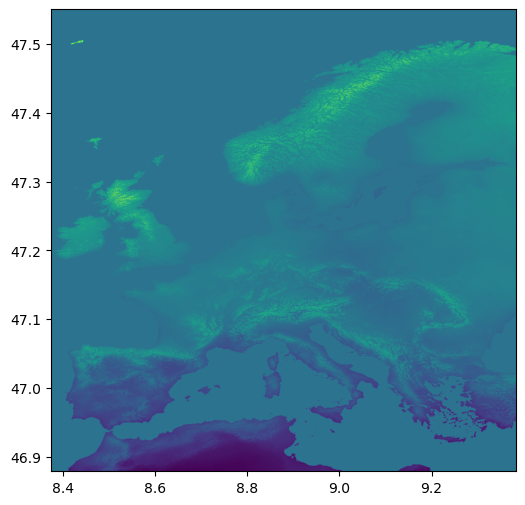

<Figure size 640x480 with 0 Axes>

In [10]:
# Europe
x, y = (20300, 1200)
eu = raster[:, y:y+5000:10, x:x+5000:10]
for i in range(2):
    plot_array(eu[i], "Europe " + str(i), (8.3743, 9.3823, 46.8790, 47.5506))

In [ ]:
for i in range(len(raster)):
    plot_array(raster[i,::100,::100], "World " + str(i), (-180, 180, -90, 90), aspect="equal")

In [ ]:
# Switzerland
x, y = (22350, 4200)
ch = raster[:, y:y+500, x:x+500]
for i in range(len(ch)):
    plot_array(ch[i], "Switzerland " + str(i), (8.3743, 9.3823, 46.8790, 47.5506))

In [ ]:
# Zurich
x, y = (22600, 4350)
zh = raster[:, y:y+100, x:x+100]
for i in range(len(zh)):
    plot_array(zh[i], "Switzerland " + str(i), (8.3743, 9.3823, 46.8790, 47.5506))

64 360 0.0003
Plotting: freq 0 lat_cos*lon_sin -0.9993479 0.99939775 1.9987457


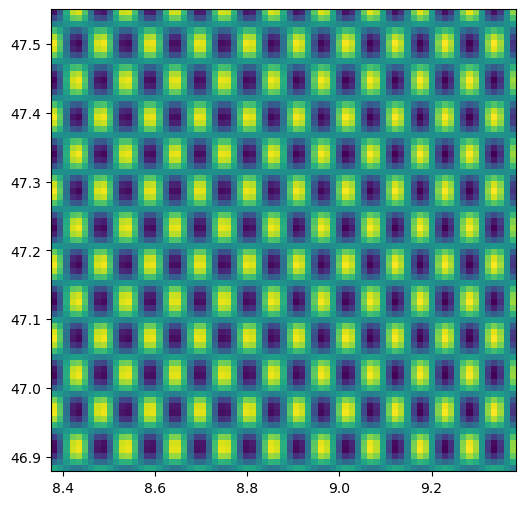

Plotting: freq 10 lat_cos*lon_sin -0.9991718 0.99992526 1.9990971


<Figure size 640x480 with 0 Axes>

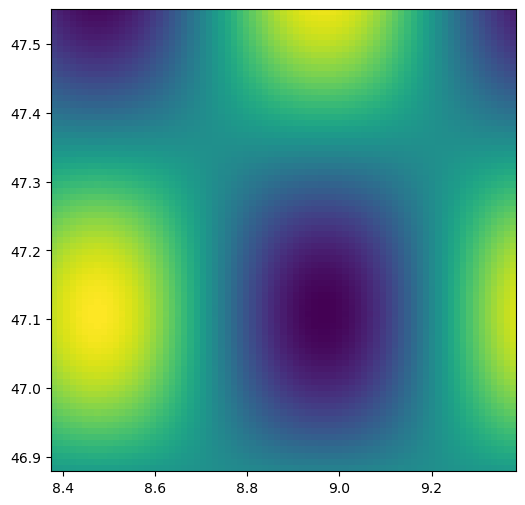

Plotting: freq 20 lat_cos*lon_sin 0.38952637 0.80528706 0.4157607


<Figure size 640x480 with 0 Axes>

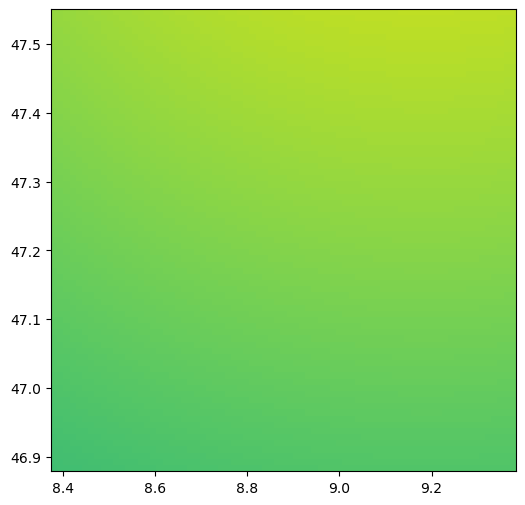

Plotting: freq 30 lat_cos*lon_sin -0.7688417 -0.7122902 0.056551456


<Figure size 640x480 with 0 Axes>

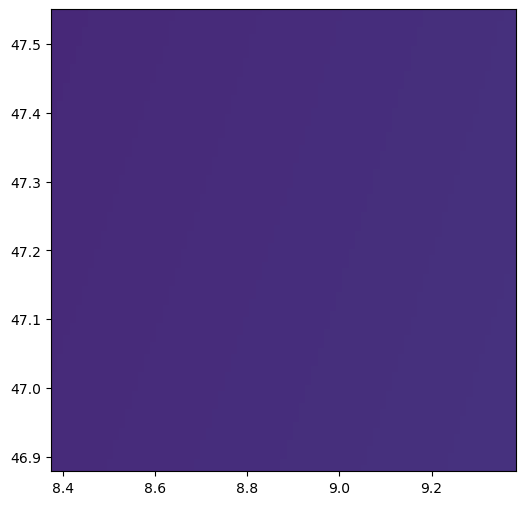

Plotting: freq 40 lat_cos*lon_sin 0.92526907 0.92779833 0.0025292635


<Figure size 640x480 with 0 Axes>

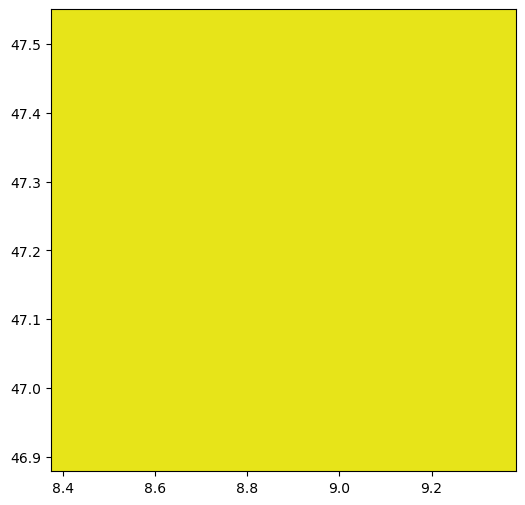

Plotting: freq 50 lat_cos*lon_sin 0.99910915 0.99913996 3.08156e-05


<Figure size 640x480 with 0 Axes>

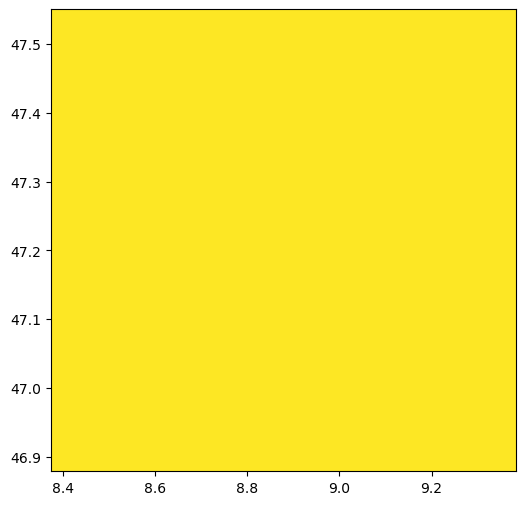

Plotting: freq 60 lat_cos*lon_sin 0.9999895 0.99998987 3.5762787e-07


<Figure size 640x480 with 0 Axes>

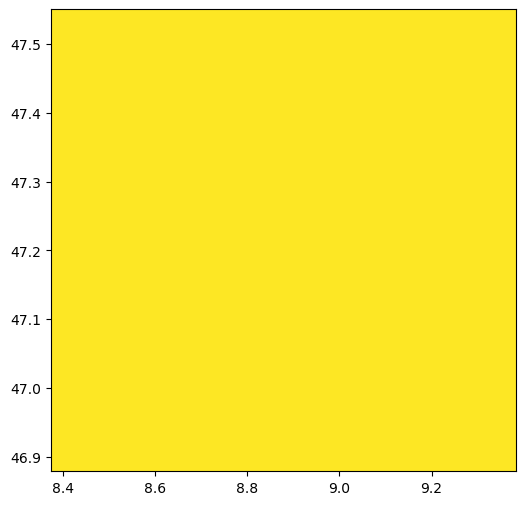

<Figure size 640x480 with 0 Axes>

In [18]:
# Map (Mai et al.) embeddings
def plot_spherec_plus(FREQ_NUM, MAX_RAD, MIN_RAD, extent):
    print(FREQ_NUM, MAX_RAD, MIN_RAD)
    sg = SphereGridSpatialRelationEncoder(20, coord_dim = 2, frequency_num = FREQ_NUM, 
            max_radius = MAX_RAD, min_radius = MIN_RAD,
                freq_init = "geometric",
                ffn=None, device = "cuda")

    step = 75

    lonlat = []
    for j in range(step):
        for i in range(step):
            # i: lon, j:lat
            lon = extent[0] + (i/(step-1)) * (extent[1] - extent[0])
            lat = extent[2] + (j/(step-1)) * (extent[3] - extent[2])
            lonlat.append([lon, lat])
    lonlat = torch.tensor(lonlat)

    out = sg(lonlat).reshape(75, 75, -1).detach().cpu().numpy()
    # [lat_sin, lat_cos, lon_sin, lon_cos, lat_cos * lon_cos, lat_cos * lon_sin]

    i = FREQ_NUM - 1
    #i = 0
    """plot_array(out[:,:,i*6], "freq " + str(i) + " Lat_sin", extent)
    plot_array(out[:,:,i*6+1], "freq " + str(i) + " lat_cos", extent)
    plot_array(out[:,:,i*6+2], "freq " + str(i) + " lon_sin", extent)
    plot_array(out[:,:,i*6+3], "freq " + str(i) + " lon_cos", extent)
    plot_array(out[:,:,i*6+4], "freq " + str(i) + " Lat_cos*lan_cos", extent)
    plot_array(out[:,:,i*6+5], "freq " + str(i) + " lat_cos*lon_sin", extent)"""
    
    for i in range(0, FREQ_NUM, 10):
        """plot_array(out[:,:,i*6], "freq " + str(i) + " Lat_sin", extent)
        plot_array(out[:,:,i*6+1], "freq " + str(i) + " lat_cos", extent)
        plot_array(out[:,:,i*6+2], "freq " + str(i) + " lon_sin", extent)
        plot_array(out[:,:,i*6+3], "freq " + str(i) + " lon_cos", extent)
        plot_array(out[:,:,i*6+4], "freq " + str(i) + " Lat_cos*lan_cos", extent)"""
        plot_array(out[:,:,i*6+4], "freq " + str(i) + " lat_cos*lon_sin", extent, v=(-1,1))
        pass
    """for i in range(0, 31):
        plot_array(out[:,:,i*6+4], "freq " + str(i) + " lat_cos*lon_sin", extent, v=(-1,1))"""

FREQ_NUM = 64
#MAX_RAD = 10000
#MIN_RAD = 0.0005
MAX_RAD = 360
MIN_RAD = 0.0003
plot_spherec_plus(FREQ_NUM, MAX_RAD, MIN_RAD, extent = (8.3743, 9.3823, 46.8790, 47.5506))
#plot_spherec_plus(FREQ_NUM, MAX_RAD, MIN_RAD, extent = (-90, 90, -90, 90))